In [12]:
import networkx as nx
import torch
import torch_geometric
from src.utils import get_edge_index, load_json
import json

region2label = load_json('./misc/region2label.json')
region2label

{'Abruzzo': 0,
 'Basilicata': 1,
 'Calabria': 2,
 'Campania': 3,
 'Emilia_Romagna': 4,
 'Friuli_Venezia_Giulia': 5,
 'Lazio': 6,
 'Liguria': 7,
 'Lombardia': 8,
 'Marche': 9,
 'Molise': 10,
 'Piemonte': 11,
 'Puglia': 12,
 'Sardegna': 13,
 'Sicilia': 14,
 'Toscana': 15,
 'Trentino_Alto_Adige': 16,
 'Umbria': 17,
 'Valle_d_Aosta': 18,
 'Veneto': 19,
 'UNK': 20}

In [13]:
json_path = './data/gz_dataset.json'

with open(json_path, 'r', encoding='utf8') as f:
    data = json.load(f)

edge_index = get_edge_index(data)
print(edge_index)
def normalize_name(input: str):
    input = input.replace('-', '_')
    input = input.replace(' ', '_')
    input = input.replace('\'', '_')
    return input
label_list = [region2label[normalize_name(el['region_gold'])] for el in data]
print(label_list)

tensor([[   0,    0,    0,  ..., 7524, 7524, 7524],
        [ 226, 1086, 1039,  ..., 2420, 2086, 2283]])
[20, 4, 20, 20, 20, 20, 20, 20, 6, 6, 20, 20, 20, 7, 6, 20, 20, 20, 20, 3, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 7, 20, 20, 20, 20, 20, 20, 4, 20, 6, 20, 3, 20, 20, 20, 11, 20, 8, 20, 20, 20, 4, 20, 7, 20, 20, 3, 20, 20, 20, 20, 12, 16, 14, 20, 20, 20, 20, 6, 20, 11, 20, 20, 20, 12, 14, 20, 20, 20, 6, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 3, 20, 14, 20, 20, 20, 20, 20, 20, 3, 20, 20, 20, 20, 20, 20, 20, 3, 20, 20, 20, 20, 20, 20, 3, 3, 4, 20, 20, 20, 20, 20, 12, 20, 3, 20, 20, 20, 20, 20, 3, 20, 20, 20, 20, 20, 20, 15, 20, 3, 20, 16, 20, 20, 15, 14, 20, 20, 14, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 8, 12, 20, 20, 20, 20, 20, 20, 3, 20, 20, 20, 20, 20, 3, 20, 20, 16, 3, 20, 7, 20, 3, 8, 20, 20, 20, 20, 20, 20, 3, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 14, 20, 20, 14, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 3, 20, 19, 20, 20, 3, 4, 20, 20, 20, 20, 20, 20, 15

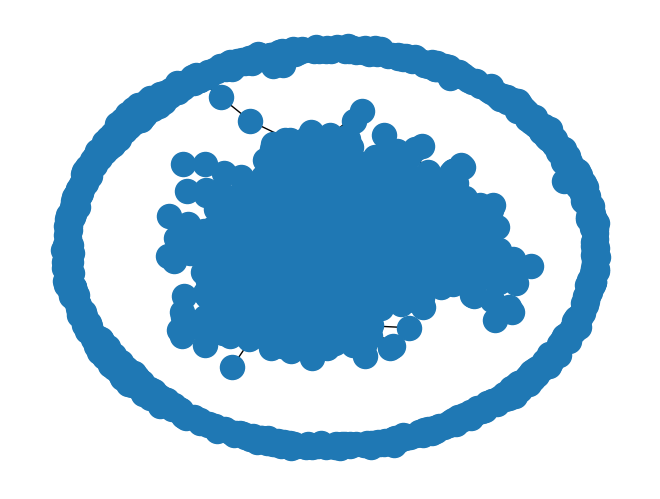

In [ ]:
x = torch.tensor(label_list, dtype=torch.float)

data = torch_geometric.data.Data(x=x, edge_index=edge_index)
g = torch_geometric.utils.to_networkx(data, to_undirected=True)
nx.draw(g)

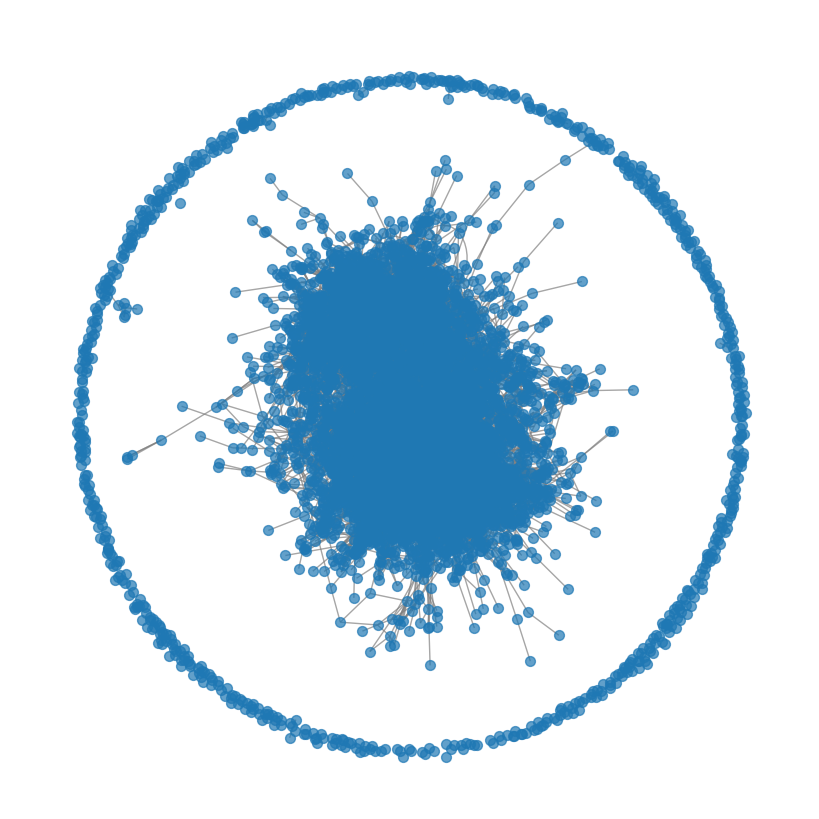

In [ ]:
import torch
from torch_geometric.data import Data
from torch_geometric.utils import to_networkx
import networkx as nx
import matplotlib.pyplot as plt

# Example dummy edge_index
# edge_index should be a LongTensor of shape [2, num_edges]
edge_index_dummy = torch.tensor([[0, 1, 2], [1, 2, 0]])  # triangle

# Create PyG graph (x is optional for visualization)
data_dummy = Data(edge_index=edge_index_dummy)

# Convert to NetworkX graph
G = to_networkx(data, to_undirected=True)

# Compute layout (spring layout is default but can be changed)
pos = nx.spring_layout(G)

# Draw edges + nodes
plt.figure(figsize=(8, 8))


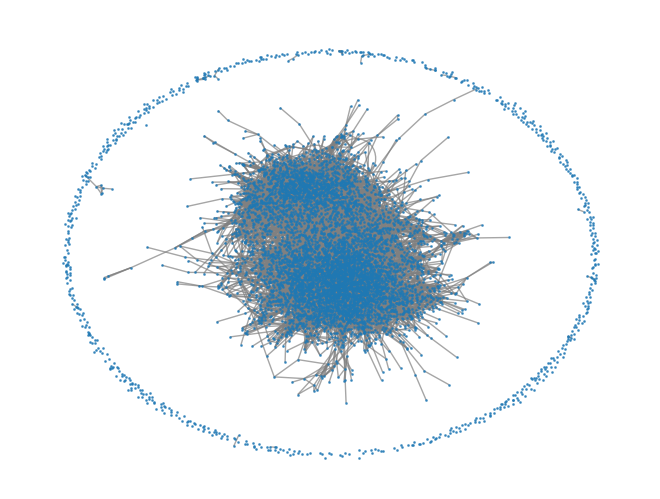

In [19]:
nx.draw(G, pos, node_size=1, edge_color='gray', alpha=0.7)
plt.show()
